In [1]:
import pickle as pkl
import pandas as pd
from math import sqrt

In [2]:
file_path = "results/rsna/scores_03052236.pkl"
with open(file_path, "rb") as file:
    results = pkl.load(file=file)
    desc = results[0]
    scores_list = results[1:]
print(desc)

200, 50 NONA. removed final bn. fixed dense output


for changing desc if needed

In [3]:
# change_desc = False
# if change_desc:
#     new_desc = f'knn with k = 5'
#     results[0] = new_desc
#     with open(file_path, "wb") as file:
#         pkl.dump(obj=results, file=file)

In [4]:
for i, scores in enumerate(scores_list):
    print(abs(scores['nona euclidean mlp'][0]))

print(i+1, 'splits')

0.01448084320873022
0.012131202034652233
0.01005573570728302
3 splits


In [5]:
scores = {method.split(" mlp")[0]: [abs(scores[method][0]) for scores in scores_list] for method in scores_list[0] if "mlp" in method and "cos" not in method}

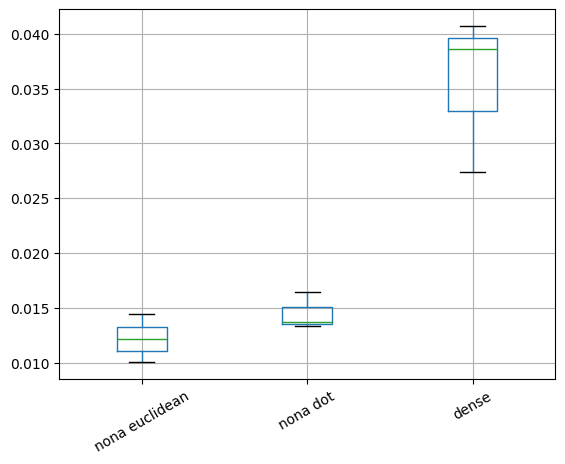

In [6]:
bplot = pd.DataFrame(scores).boxplot(rot=30)
# bplot.set_ylabel('MSE')

In [7]:
pd.DataFrame(scores).median()

nona euclidean    0.012131
nona dot          0.013745
dense             0.038591
dtype: float64

In [8]:
times = {method: [scores[method][1] for scores in scores_list] for method in scores_list[0]}

In [9]:
pd.DataFrame(times).median() / 3600

nona euclidean mlp    2.513083
nona dot mlp          0.801603
dense mlp             1.603162
dtype: float64